In [13]:
import scipy.stats as ss
import statistics as stats
import pandas as pd
import seaborn as sb

## Load data from salary.csv

In [14]:
data = pd.read_csv("Salary.csv")  # returns DataFrame
data.sample(10)

,exp,salary
17,5.3,83088
2,1.5,37731
0,1.1,39343
19,6.0,93940
33,12.9,135675
34,13.5,139465
13,4.1,57081
22,7.9,101302
7,3.2,54445
26,9.5,116969


In [15]:
salaries = data['salary']
years = data['exp']

In [16]:
type(salaries)

pandas.core.series.Series

In [17]:
stats.mean(salaries)

83945.6

In [18]:
stats.median(salaries)

81363

In [19]:
ss.skew(salaries)

0.1999389188655196

In [20]:
ss.kurtosis(salaries)

-1.3904143013696357

<Axes: ylabel='Frequency'>

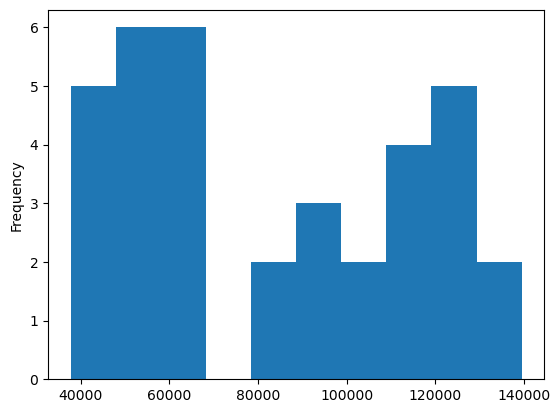

In [21]:
salaries.plot(kind='hist', bins=10)

In [22]:
ss.iqr(salaries)

56204.5

In [36]:
r, p = ss.pearsonr( data['exp'], data['salary'])

In [37]:
print(f"{r:.2f}, {p:.5f}")

0.98, 0.00000


<Axes: xlabel='exp', ylabel='salary'>

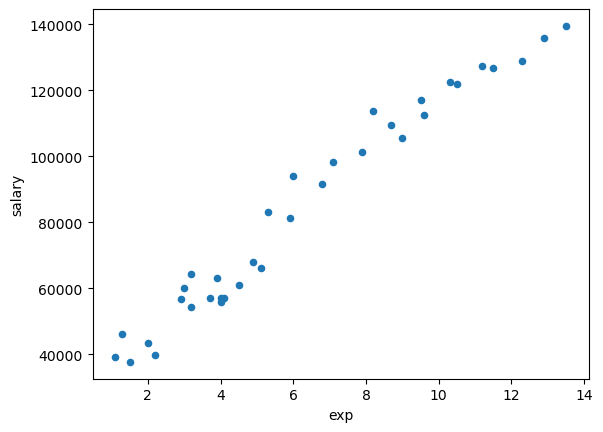

In [25]:
data.plot(x='exp', y='salary', kind='scatter')

In [26]:
lr = ss.linregress(years,salaries)

In [27]:
lr

LinregressResult(slope=8731.941047062492, intercept=28859.526194531478, rvalue=0.9824272546479683, pvalue=1.2309905889928102e-25, stderr=288.78315746221443, intercept_stderr=2092.7971310998655)

In [28]:
exp = [2,8,6,5,4]
pre_sals = []
for x in exp:
   pre_sals.append( lr.intercept + lr.slope * x)

In [29]:
pre_sals

[46323.40828865646,
 98715.05457103142,
 81251.17247690642,
 72519.23142984393,
 63787.290382781444]

### Compare actual with expected

In [30]:
exp_sals = []
for x in years:
   exp_sals.append(lr.intercept +  lr.slope * x)

In [31]:
exp_sals

[38464.66134630022,
 40211.049555712714,
 41957.437765125214,
 46323.40828865646,
 48069.79649806896,
 54182.1552310127,
 55055.34933571895,
 56801.73754513145,
 56801.73754513145,
 61167.7080686627,
 62914.096278075194,
 63787.290382781444,
 63787.290382781444,
 64660.48448748769,
 68153.26090631269,
 71646.03732513769,
 73392.42553455019,
 75138.81374396267,
 80377.97837220019,
 81251.17247690642,
 88236.72531455642,
 90856.30762867516,
 97841.86046632516,
 100461.4427804439,
 104827.41330397516,
 107446.9956180939,
 111812.96614162516,
 112686.16024633139,
 118798.51897927513,
 120544.90718868765,
 126657.26592163139,
 129276.84823575013,
 136262.40107340013,
 141501.56570163762,
 146740.7303298751]

In [32]:
salaries

0      39343
1      46205
2      37731
3      43525
4      39891
5      56642
6      60150
7      54445
8      64445
9      57189
10     63218
11     55794
12     56957
13     57081
14     61111
15     67938
16     66029
17     83088
18     81363
19     93940
20     91738
21     98273
22    101302
23    113812
24    109431
25    105582
26    116969
27    112635
28    122391
29    121872
30    127345
31    126756
32    128765
33    135675
34    139465
Name: salary, dtype: int64

In [33]:
ds = pd.DataFrame( {'years' : years, 'exp_sals' : exp_sals})

In [34]:
ds.head()

,years,exp_sals
0,1.1,38464.661346
1,1.3,40211.049556
2,1.5,41957.437765
3,2.0,46323.408289
4,2.2,48069.796498


<Axes: xlabel='exp', ylabel='salary'>

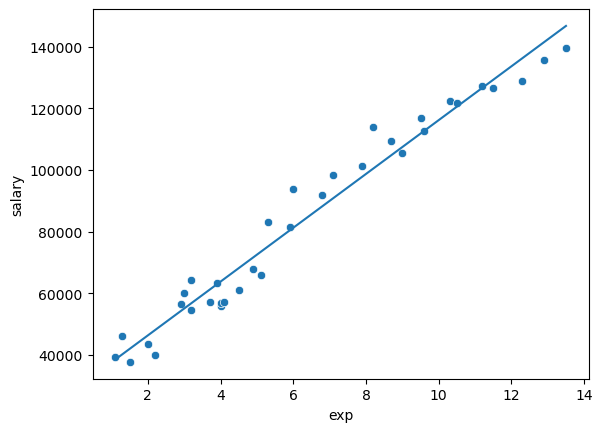

In [35]:
# Compare exp with actual 
sb.scatterplot(x='exp', y='salary', data = data)
sb.lineplot(x='years', y='exp_sals',data= ds)